<a href="https://colab.research.google.com/github/ArcticFoox/optimization/blob/main/LecNADL_T07_%EC%88%98%EC%B9%98%EC%B5%9C%EC%A0%81%ED%99%94Algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Lec_NADL] 05/25

#수치 최적화 알고리즘
- GD: 경사 하강 (Gradient Descent)
- **Stochastic GD (SGD): 확률적 경사 하강**
- **Adam: Adaptive Moments (Hybrid: Momentum 방법 & RMSProp 방법)**

## **확률적 경사 하강 (SGD)**
- GD 대비 주요한 차이점
  - **탐색방향 결정(계산) 방법**

- 주요 용어
  - **배치**(batch) / **배치 크기**(batch size)
  - **epoch**(시대,에포크) (vs. iteration(반복))

* epoch:  learning 알고리즘에서'모든 training dataset'이 1회 사용되는 과정(단위)을 의미함.

#Review: GD(선형회귀문제)
-  손실함수 & 탐색방향(손실함수의 gradient)


---
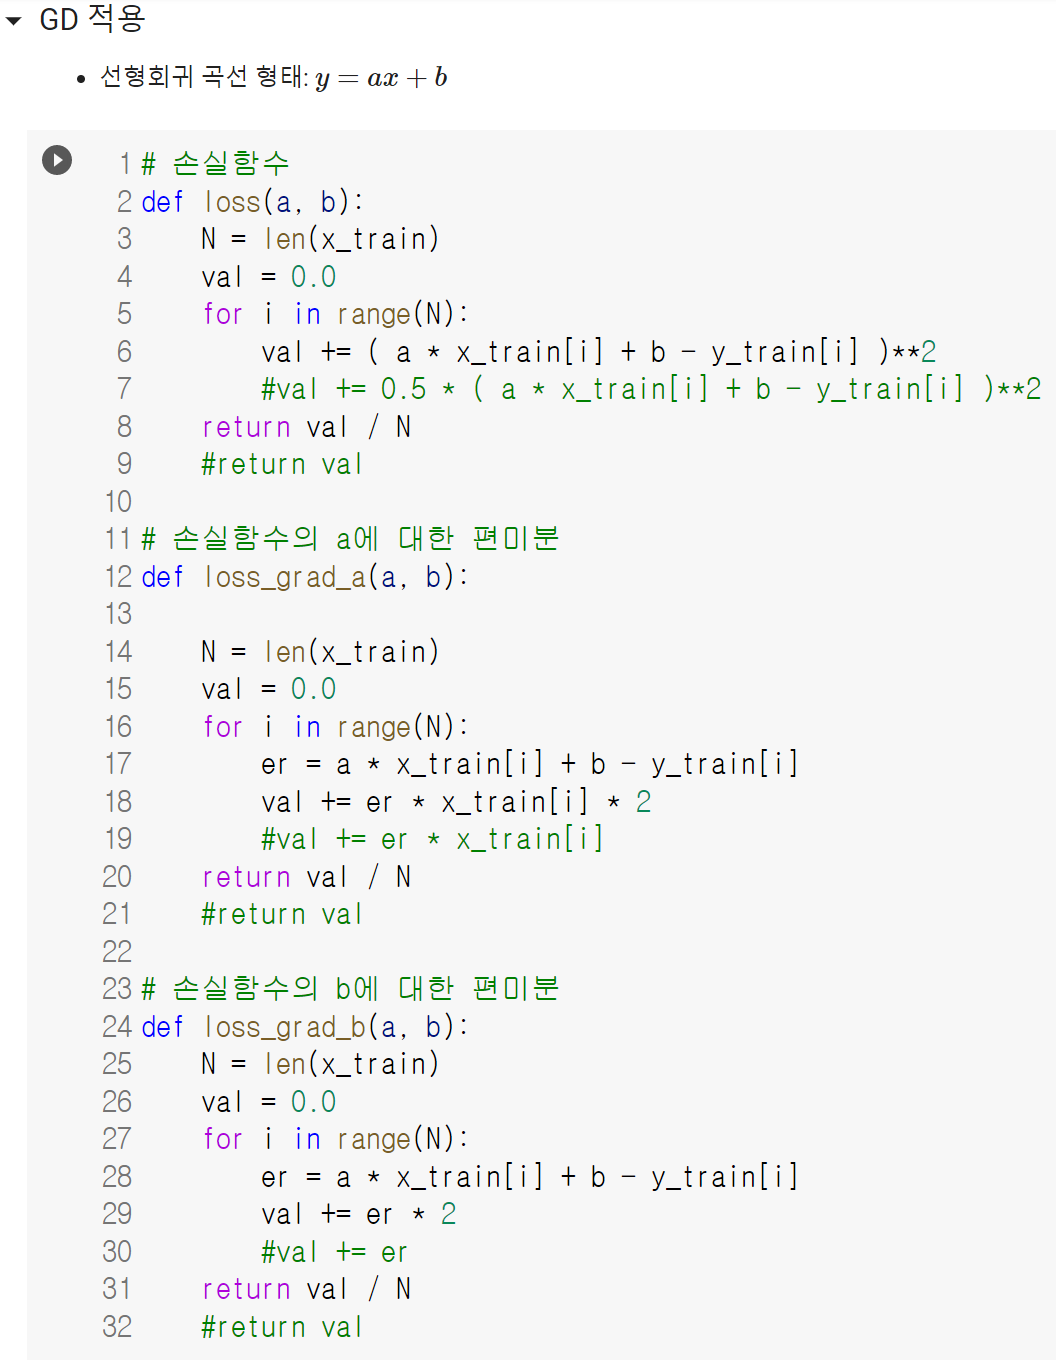



# 알고리즘 비교: **GD vs SGD**
- **GD: iteration**
  - 탐색방향 계산에 사용되는 '자료 수'?

- **SGD: epoch, batch(minibatch) 크기**
  - 각 배치에서 '탐색방향 계산에 사용되는 자료 수'?

- Deep Learning 활용 예: image classification
  - data: images
  - CIFAR10 [웹자료](https://www.cs.toronto.edu/~kriz/cifar.html)
    - 60,000 images (6,000 per class; 10 classes)
  - TensorFlow (시각화된 자료) [웹자료](https://www.tensorflow.org/datasets/catalog/cifar10)
  - PyTorch [웹자료](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)

## **비교: GD vs SGD**

---
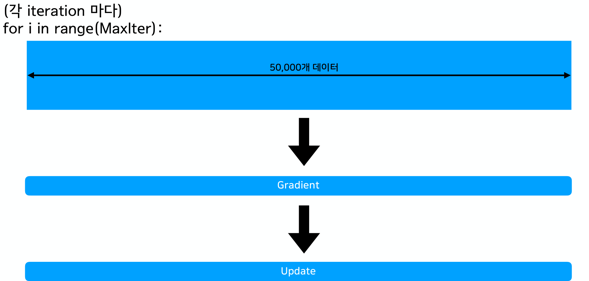




---

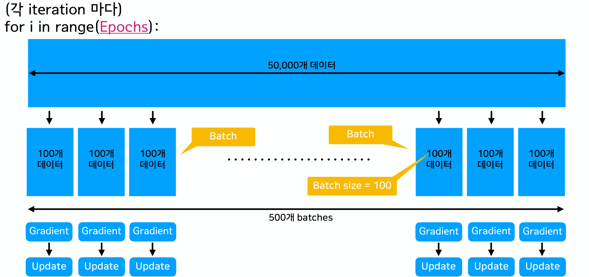



# **SGD: Part-A**

### Part(1): 자료(training data) 생성

[-1.         -0.95918367 -0.91836735 -0.87755102 -0.83673469 -0.79591837
 -0.75510204 -0.71428571 -0.67346939 -0.63265306 -0.59183673 -0.55102041
 -0.51020408 -0.46938776 -0.42857143 -0.3877551  -0.34693878 -0.30612245
 -0.26530612 -0.2244898  -0.18367347 -0.14285714 -0.10204082 -0.06122449
 -0.02040816  0.02040816  0.06122449  0.10204082  0.14285714  0.18367347
  0.2244898   0.26530612  0.30612245  0.34693878  0.3877551   0.42857143
  0.46938776  0.51020408  0.55102041  0.59183673  0.63265306  0.67346939
  0.71428571  0.75510204  0.79591837  0.83673469  0.87755102  0.91836735
  0.95918367  1.        ]

[0.78574159 0.62279481 0.93814004 0.72150122 0.86499739 0.85115953
 0.63109945 0.67370079 0.90634104 0.7042696  0.75735387 1.09007932
 0.94743363 0.92818283 1.06045081 0.99368385 1.06051158 1.21971149
 1.08782982 1.04038442 1.23899142 1.14773768 1.31747766 1.32483893
 1.34687377 1.37697682 1.1934449  1.13853236 1.2355545  1.22705389
 1.25411949 1.1516581  1.51647387 1.38753167 1.5511003

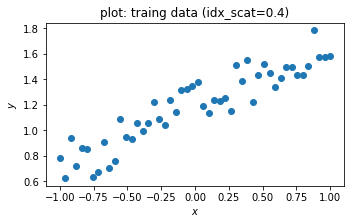

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(320)

x_train = np.linspace(-1, 1, 50)
f = lambda x: 0.5 * x + 1.0

idx_scat = 0.4
y_train = f(x_train) + idx_scat * np.random.rand(len(x_train))

print(x_train)
print()
print(y_train)

#DIY(1)
plt.figure()
plt.plot(x_train, y_train, 'o')
# title,labels
plt.title('plot: traing data (idx_scat=0.4)')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()


### Part(2): 주요함수 정의 (손실함수 & 탐색방향)

In [ ]:
# 손실함수
def loss(w, x_set, y_set):
    N = len(x_set)
    val = 0.0

    for i in range(len(x_set)):
        val += ( w[0] * x_set[i] + w[1] - y_set[i] )**2

    return val / N

#손실함수의 그래디언트
def loss_grad(w, x_set, y_set):
    N = len(x_set)
    val = np.zeros(len(w))

    for i in range(len(x_set)):
        ## DIY(2)
        er = 2*(w[0] * x_set[i] + w[1] - y_set[i])
        val += er * np.array([x_set[i], 1.0])

    return val / N

### Part(3): batch 생성을 위한 전처리 단계
- 자료 섞기(shuffle)

In [ ]:
idx = np.arange(len(x_train))
print(idx)
np.random.shuffle(idx)
print(idx)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
[32 17 47 33  1  7 23 19 21 40  3 14 18  0  4 12 42 41 25 10  2 36 31  6
 16 24 11 22 45 46 49 15 38 48  8 37 30  9 35 13 28 34 29 27 39 26 20 44
  5 43]


### Part(4): 함수 정의(batch 생성)



In [ ]:
def generate_batches(batch_size, features, labels):
    out_batches = []
    sample_size = len(features)

    for start_i in range(0, sample_size, batch_size):

        ## DIY(3)
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]

        out_batches.append(batch)
    return out_batches

## Part(5): batch 생성
  - 배치 크기(예): 3

In [ ]:
chosen_batchsize = 5

for x_batch, y_batch in generate_batches(chosen_batchsize, x_train, y_train):
    print(x_batch, y_batch)

[-1.         -0.95918367 -0.91836735 -0.87755102 -0.83673469] [0.78574159 0.62279481 0.93814004 0.72150122 0.86499739]
[-0.79591837 -0.75510204 -0.71428571 -0.67346939 -0.63265306] [0.85115953 0.63109945 0.67370079 0.90634104 0.7042696 ]
[-0.59183673 -0.55102041 -0.51020408 -0.46938776 -0.42857143] [0.75735387 1.09007932 0.94743363 0.92818283 1.06045081]
[-0.3877551  -0.34693878 -0.30612245 -0.26530612 -0.2244898 ] [0.99368385 1.06051158 1.21971149 1.08782982 1.04038442]
[-0.18367347 -0.14285714 -0.10204082 -0.06122449 -0.02040816] [1.23899142 1.14773768 1.31747766 1.32483893 1.34687377]
[0.02040816 0.06122449 0.10204082 0.14285714 0.18367347] [1.37697682 1.1934449  1.13853236 1.2355545  1.22705389]
[0.2244898  0.26530612 0.30612245 0.34693878 0.3877551 ] [1.25411949 1.1516581  1.51647387 1.38753167 1.55110038]
[0.42857143 0.46938776 0.51020408 0.55102041 0.59183673] [1.22031966 1.43410404 1.51725848 1.45144753 1.34402611]
[0.63265306 0.67346939 0.71428571 0.75510204 0.79591837] [1.413

## **Part(6): SGD Algo**
- 선택(설정)되어야 하는 변수
  - 배치크기
  - 학습률  --> 고정된 값 이용
  - 에포크(epoch) --> epoch 최대 수

[0. 0.]
[-0.63265306  0.51020408 -1.          0.18367347 -0.71428571 -0.95918367
  0.95918367  0.67346939 -0.3877551  -0.83673469 -0.42857143 -0.55102041
 -0.67346939  0.79591837 -0.10204082  0.02040816  0.06122449  0.87755102
 -0.14285714  0.2244898   0.59183673 -0.06122449 -0.26530612  0.55102041
  0.30612245 -0.02040816  0.3877551  -0.51020408  0.26530612  0.10204082
 -0.18367347  0.75510204  0.91836735 -0.2244898   0.71428571  0.46938776
 -0.34693878 -0.75510204 -0.87755102  0.34693878  0.83673469  0.42857143
  0.63265306 -0.30612245  1.         -0.79591837  0.14285714 -0.59183673
 -0.91836735 -0.46938776]

[0.7042696  1.51725848 0.78574159 1.22705389 0.67370079 0.62279481
 1.57728913 1.49735717 0.99368385 0.86499739 1.06045081 1.09007932
 0.90634104 1.43661817 1.31747766 1.37697682 1.1934449  1.78654459
 1.14773768 1.25411949 1.34402611 1.32483893 1.08782982 1.45144753
 1.51647387 1.34687377 1.55110038 0.94743363 1.1516581  1.13853236
 1.23899142 1.43479366 1.57711856 1.04038442 1

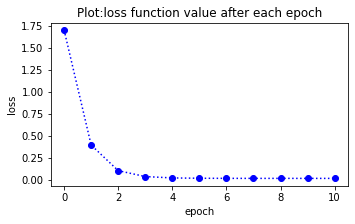

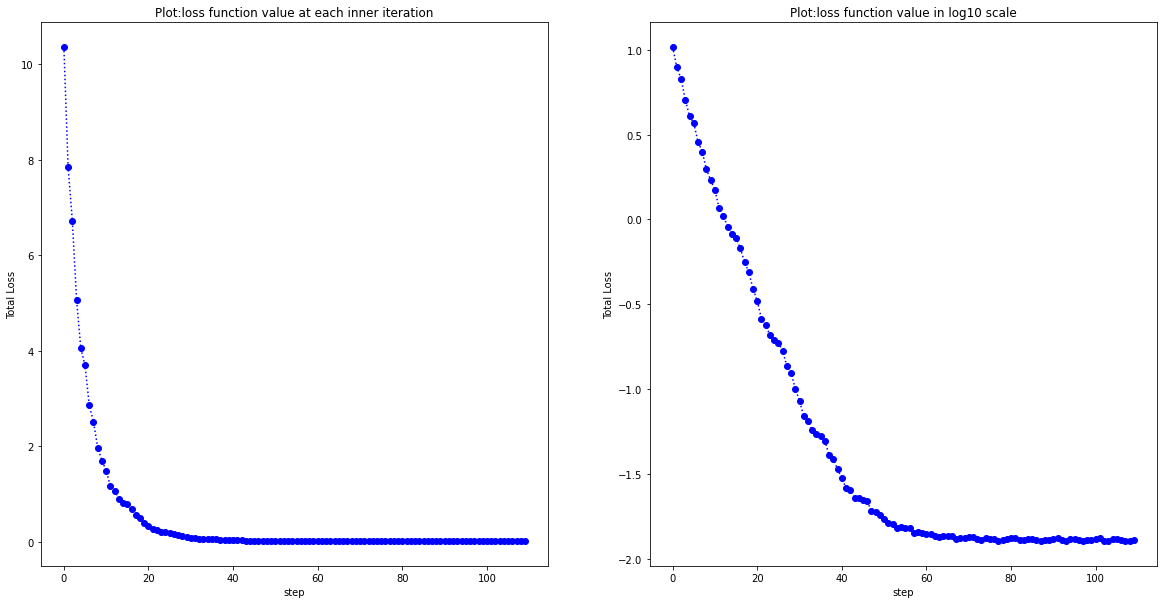

In [ ]:
# SGD
batch_size = 5 # 배치 크기
lr = 0.1 # 학습률
MaxEpochs = 10 # 반복 횟수

paths = []
batch_loss = []
w0 = np.array([-4.0, -1.0]) # 1) 초깃값
search_direction = np.zeros_like(w0)

#
loss_epoch = []
GLoss_batch = []

print(search_direction)

# 2) 데이터 셔플링
np.random.seed(320)

idx = np.arange(len(x_train))
np.random.shuffle(idx)

shuffled_x_train = x_train[idx]
shuffled_y_train = y_train[idx]

print(shuffled_x_train)
print()
print(shuffled_y_train)
print()

# 알고리즘
for epoch in range(MaxEpochs+1): # 5) MaxEpochs번 반복

    ## DIY(4)
    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train): # 3) 미니 배치 생성

        paths.append(w0)
        batch_loss.append(loss(w0, x_batch, y_batch))

        grad = loss_grad(w0, x_batch, y_batch) # 4)-1 미니 배치에서 그래디언트 계산
        search_direction = -grad # 4)-2 탐색 방향 설정
        lr = lr # 4)-3 학습률 설정
        # 4)-4 파라미터 업데이트
        dw = lr * search_direction
        w0 = w0 + dw

    #print('{:02d}\t{}\t{:5.8f}'.format(epoch, w0, loss(w0, x_train, y_train)))
        GLoss_batch.append(loss(w0, x_train, y_train))

    loss_epoch.append(loss(w0, x_train, y_train))
    print('{:02d}\t{}\t{:e}'.format(epoch, w0, loss(w0, x_train, y_train)))


##
print()
print('찾아진 회귀곡선의 기울기와 절편')
print(w0)
print()
## 개별 추가 작성
plt.figure()
plt.plot(loss_epoch, 'bo:')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Plot:loss function value after each epoch')
plt.show()

##

## 추가: Global Loss 관찰을 위한 plot
plt.subplots(1,2, figsize=(20,10))

plt.subplot(1,2,1)
plt.plot(GLoss_batch, 'bo:')
plt.xlabel('step')
plt.ylabel('Total Loss')
plt.title('Plot:loss function value at each inner iteration')

plt.subplot(1,2,2)
plt.plot(np.log10(GLoss_batch), 'bo:')
plt.xlabel('step')
plt.ylabel('Total Loss')
plt.title('Plot:loss function value in log10 scale')
plt.show()


# **SGD: Part-B**

### SGD 알고리즘: 관찰(1)
- 시각화(1): 손실함숫값이 최소로 접근해 가는 과정

In [ ]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
#%matplotlib inline
#%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (16./3, 3)

def contour_with_path(l, x, y, paths, norm=LogNorm(), level=np.logspace(0, 5, 35), minima=None):
    paths = np.array(paths).T
    fig, ax = plt.subplots(figsize=(7, 4))

    ax.contour(x, y, l, levels=level, norm=norm, cmap=plt.cm.jet)
    ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1], \
              scale_units='xy', angles='xy', scale=1, color='k')

    if minima is not None:
        ax.plot(*minima, 'r*', markersize=18)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

    plt.show()


In [ ]:
W0 = np.linspace(-5, 7, 101)
W1 = np.linspace(-2, 5, 101)
W0, W1 = np.meshgrid(W0,W1)
LOSSW = W0 * 0
for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        wij = np.array([W0[i,j], W1[i,j]])
        LOSSW[i,j] = loss(wij, x_train, y_train)

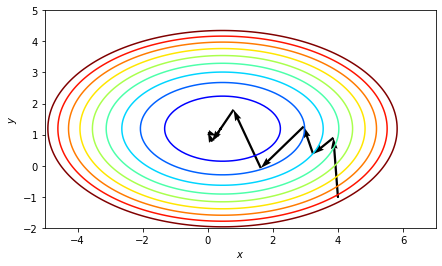

In [ ]:
contour_with_path(LOSSW, W0, W1, paths, norm=None, level=np.linspace(0, 10, 10))

### SGD 알고리즘: 관찰(2)
- 시각화(2): 매 에포크 을 통해 찾아진 가중치(weights; 선형회귀곡선의 기울기/절편)의 근삿값에 대한 '손실함숫값'

110

[7.30686267e+00 1.33622796e+01 4.79906072e+00 7.17449968e+00
 4.68310388e+00 1.74942522e+00 5.33253700e+00 3.00296569e+00
 3.84268106e+00 2.40948673e+00 2.03337281e+00 2.46224097e+00
 7.37362368e-01 9.26087590e-01 5.68158695e-01 2.69702648e-01
 8.43522530e-01 9.02439958e-01 6.17916574e-01 7.10563436e-01
 5.88815278e-01 5.63694356e-01 1.42555825e-01 2.28561369e-01
 1.18546111e-01 7.57957827e-02 1.60084206e-01 2.63329714e-01
 1.07193777e-01 1.73508101e-01 1.78438982e-01 1.33600208e-01
 2.71842735e-02 7.94227533e-02 3.54448652e-02 3.32098593e-02
 2.98478907e-02 8.95191549e-02 1.78541004e-02 4.60478164e-02
 6.79311395e-02 3.46740401e-02 1.06252285e-02 3.82219337e-02
 1.81861785e-02 2.29478186e-02 6.71589567e-03 3.96177073e-02
 6.77882869e-03 1.80106686e-02 3.58607828e-02 1.15557033e-02
 1.14510166e-02 2.47916806e-02 1.46643935e-02 2.02857709e-02
 4.24145741e-03 2.34731830e-02 8.45241492e-03 1.22192780e-02
 2.53123997e-02 5.97044916e-03 1.38047310e-02 1.97672593e-02
 1.40291869e-02 1.9

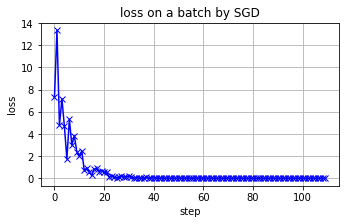

In [ ]:
print(len(batch_loss))
print()

print(np.array(batch_loss).T)

plt.plot(batch_loss, 'x-b', markerfacecolor='none')
plt.grid()
plt.xlabel('step')
plt.ylabel('loss')
plt.title('loss on a batch by SGD')
plt.show()

### Revisit
- 시각화: visualize_l2


---


- 시각화를 위해 사용할 모듈
  - "from matplotlib.patches import Rectangle"
    - 웹자료(1): [Matplotlib: Rectangle](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html)
    - 웹자료(2): [Matplotlib: box for error bar](https://matplotlib.org/stable/gallery/statistics/errorbars_and_boxes.html#sphx-glr-gallery-statistics-errorbars-and-boxes-py)

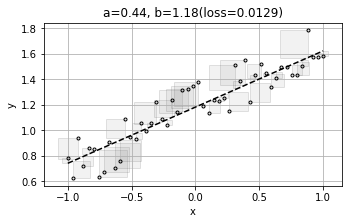

In [ ]:
from matplotlib.patches import Rectangle
def visualize_l2(w, b, x_train, y_train, loss):
    from matplotlib.patches import Rectangle
    loss_name = 'loss'
    plt.plot(x_train, y_train, '.k', markerfacecolor='none')
    plt.plot(x_train, w * x_train + b, '--k')
    currentAxis = plt.gca()
    for xx,yy in zip(x_train, y_train):
        currentAxis.add_patch(Rectangle((xx, yy),
                                        w * xx + b - yy, w * xx + b - yy,
                              alpha=0.1, facecolor='gray', edgecolor='k'))
    plt.grid()
    plt.axis('equal')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("a={:1.2f}, b={:1.2f}(loss={:5.4f})".format(w, b, loss))

visualize_l2(w0[0], w0[1], x_train, y_train, loss(w0, x_train, y_train))

In [ ]:
"""
def visualize_l2(w, b, x_train, y_train, loss):
    from matplotlib.patches import Rectangle
    loss_name = loss.__name__
    plt.plot(x_train, y_train, '.k', markerfacecolor='none') # train date 그리기
    plt.plot(x_train, w * x_train + b, '--b') # 예측된 선형회귀곡선 그리기
    currentAxis = plt.gca()
    for xx,yy in zip(x_train, y_train):
        currentAxis.add_patch(Rectangle((xx, yy),                            ## corner point
                                        w * xx + b - yy, w * xx + b - yy,    ## width, height
                              alpha=0.1, facecolor='gray', edgecolor='k'))
    plt.grid()
    plt.axis('equal')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("a={:1.2f}, b={:1.2f}({}={:5.4f})".format(w, b, loss_name, loss(w,b)))

visualize_l2(-4, -1, x_train, y_train, loss)
plt.show()
"""

'\ndef visualize_l2(w, b, x_train, y_train, loss):\n    from matplotlib.patches import Rectangle\n    loss_name = loss.__name__\n    plt.plot(x_train, y_train, \'.k\', markerfacecolor=\'none\') # train date 그리기\n    plt.plot(x_train, w * x_train + b, \'--b\') # 예측된 선형회귀곡선 그리기\n    currentAxis = plt.gca()\n    for xx,yy in zip(x_train, y_train):\n        currentAxis.add_patch(Rectangle((xx, yy),                            ## corner point\n                                        w * xx + b - yy, w * xx + b - yy,    ## width, height\n                              alpha=0.1, facecolor=\'gray\', edgecolor=\'k\'))\n    plt.grid()\n    plt.axis(\'equal\')\n    plt.xlabel(\'x\')\n    plt.ylabel(\'y\')\n    plt.title("a={:1.2f}, b={:1.2f}({}={:5.4f})".format(w, b, loss_name, loss(w,b)))\n\nvisualize_l2(-4, -1, x_train, y_train, loss)\nplt.show()\n'

## **적응형 알고리즘**
- GD & SGD 대비 주요한 차이점
  - **학습률 선택 방법**

- GD & SGD: 상수의 고정된 학습률 사용에 따른 한계점
  - 상대적으로 작은 학습률: 수렴 (ok) vs 수렴속도 (느림)
  - 상대적으로 큰 학습률: 폭발(blow-up) 현상

- 해결 방안: 적응형 알고리즘 (adaptive algo.)

* version(1)

00	[0.6319304  1.21310011]	0.0241
01	[0.47328733 1.19452944]	0.0129
02	[0.46843352 1.19624498]	0.0129
03	[0.46862984 1.19579444]	0.0129
04	[0.46863594 1.19578046]	0.0129
05	[0.46863613 1.19578002]	0.0129
06	[0.46863613 1.19578001]	0.0129
07	[0.46863613 1.19578001]	0.0129
08	[0.46863613 1.19578001]	0.0129
09	[0.46863613 1.19578001]	0.0129
10	[0.46863613 1.19578001]	0.0129


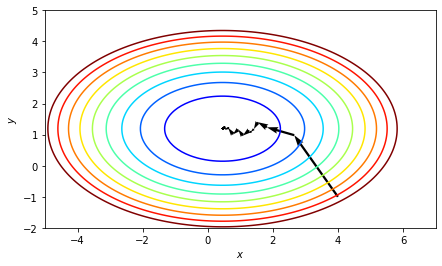

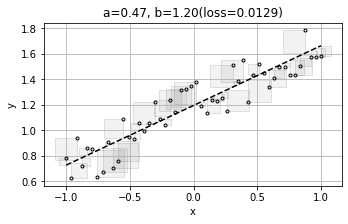

In [ ]:
import numpy as np
# 적응형 알고리즘
batch_size = 5 # 뱃치 크기
lr = 0.3 # 학습률
MaxEpochs = 10 # 반복 횟수
search_direction = np.zeros_like(w0)

paths = []
batch_loss = []
w0 = np.array([4.0, -1.0]) # 1) 초깃값

# 2) 데이터 셔플링은 생략합니다.

# 알고리즘
for epoch in range(MaxEpochs+1): # 5) MaxEpochs번 반복
    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train): # 3) 미니 뱃치 생성
        paths.append(w0)
        batch_loss.append(loss(w0, x_batch, y_batch))
        grad = loss_grad(w0, x_batch, y_batch) # 4)-1 미니 뱃치에서 그래디언트 계산
        search_direction = -grad # 4)-2 탐색 방향 설정
        lr = lr # 4)-3 학습률 설정
        # 4)-4 파라미터 업데이트
        dw = lr * search_direction
        w1 = w0 + dw
        # 적응형 알고리즘 예
        loss0, loss1 = loss(w0, x_train, y_train), loss(w1, x_train, y_train)
        if loss0 > loss1:
            w0 = w1
        else:
            lr = lr / 2
    print('{:02d}\t{}\t{:5.4f}'.format(epoch, w0, loss(w0, x_train, y_train)))

contour_with_path(LOSSW, W0, W1, paths, norm=None, level=np.linspace(0, 10, 10))
visualize_l2(w0[0], w0[1], x_train, y_train, loss(w0, x_train, y_train))

# **AdaGrad**
- 누적 gradient 이용: 장기

Iter	w_k		grad		dw		loss
1-00	[2.00 4.00]
1-01	[3.00 3.00]	[-0.60 4.71]	[1.00 -1.00]	5.5308
1-02	[2.02 2.45]	[2.79 3.12]	[-0.98 -0.55]	2.4452
1-03	[1.81 2.15]	[0.61 1.80]	[-0.21 -0.30]	1.5642
1-04	[1.55 1.78]	[0.79 2.34]	[-0.26 -0.37]	0.7745
1-05	[1.35 1.54]	[0.63 1.56]	[-0.21 -0.24]	0.4102
1-06	[1.28 1.43]	[0.20 0.75]	[-0.06 -0.11]	0.3059
1-07	[1.00 1.25]	[0.90 1.15]	[-0.28 -0.17]	0.1206
1-08	[0.92 1.26]	[0.27 -0.05]	[-0.08 0.01]	0.0926
1-09	[0.73 1.16]	[0.63 0.70]	[-0.19 -0.10]	0.0398
1-10	[0.64 1.21]	[0.28 -0.33]	[-0.09 0.05]	0.0254
2-01	[0.63 1.20]	[0.05 0.03]	[-0.02 -0.00]	0.0232
2-02	[0.57 1.20]	[0.20 0.05]	[-0.06 -0.01]	0.0172
2-03	[0.52 1.22]	[0.16 -0.15]	[-0.05 0.02]	0.0149
2-04	[0.53 1.23]	[-0.03 -0.05]	[0.01 0.01]	0.0158
2-05	[0.51 1.23]	[0.05 -0.00]	[-0.01 0.00]	0.0152
2-06	[0.51 1.22]	[0.01 0.04]	[-0.00 -0.01]	0.0147
2-07	[0.48 1.20]	[0.12 0.13]	[-0.04 -0.02]	0.0130
2-08	[0.50 1.19]	[-0.09 0.09]	[0.03 -0.01]	0.0135
2-09	[0.46 1.17]	[0.15 0.12]	[-0.05 -0.02]	0.0132
2-10	[0.

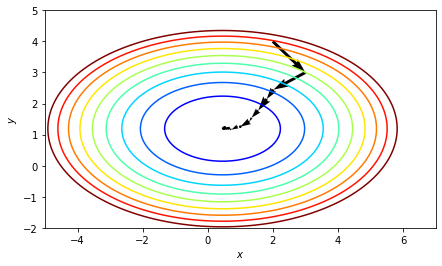

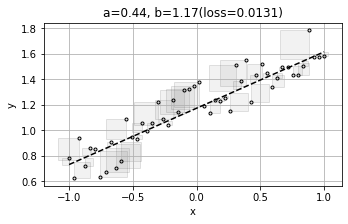

In [ ]:
batch_size = 5 # batch
MaxEpochs = 2 # epoch

epsilon = 1.0
delta = 1E-7
r = np.zeros_like(w0)

paths = []
batch_loss = []

w0 = np.array([2.0, 4.0]) # 1) 초깃값
print('Iter\tw_k\t\tgrad\t\tdw\t\tloss')
print('{:01d}-{:02d}\t{}'.format(1,0,np.array2string(w0, formatter={'float_kind':lambda x: "%.2f" % x})))

# 2) 데이터 셔플링 : 선택적(생략)

# 알고리즘
for epoch in range(MaxEpochs): # 5) MaxEpochs번 반복
    k = 0
    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train): # 3) 미니 뱃치 생성
        paths.append(w0)
        batch_loss.append(loss(w0, x_batch, y_batch))
        grad = loss_grad(w0, x_batch, y_batch) # 4)-1 미니 뱃치에서 그래디언트 계산
        search_direction = -grad # 4)-2 탐색 방향 설정
        # 4)-3 학습률 설정
        r = r  + grad * grad
        lr = epsilon / (delta + np.sqrt(r))
        dw = lr * search_direction # 4)-4 파라미터 업데이트
        w0 = w0 + dw
        print('{:01d}-{:02d}\t{}\t{}\t{}\t{:5.4f}'.format(epoch+1,k +1,
                                                  np.array2string(w0, formatter={'float_kind':lambda x: "%.2f" % x}),
                                                  np.array2string(grad, formatter={'float_kind':lambda x: "%.2f" % x}),
                                                  np.array2string(dw, formatter={'float_kind':lambda x: "%.2f" % x}),
                                                  loss(w0, x_train, y_train)))
        k += 1

contour_with_path(LOSSW, W0, W1, paths, norm=None, level=np.linspace(0, 10, 10))
visualize_l2(w0[0], w0[1], x_train, y_train, loss(w0, x_train, y_train))

# RMSProp
- Root Mean Square Propagation
- 누적 gradient 이용: 단기

Iter	w_k		grad		dw		loss
1-00	[2.00 4.00]
1-01	[2.79 3.21]	[-0.60 4.71]	[0.79 -0.79]	5.9776
1-02	[2.02 2.72]	[2.48 3.58]	[-0.77 -0.49]	3.1844
1-03	[1.86 2.40]	[0.50 2.33]	[-0.16 -0.31]	2.1660
1-04	[1.57 2.04]	[0.91 2.88]	[-0.29 -0.36]	1.1695
1-05	[1.33 1.78]	[0.76 2.10]	[-0.24 -0.26]	0.6263
1-06	[1.26 1.62]	[0.22 1.23]	[-0.07 -0.16]	0.4230
1-07	[0.93 1.42]	[1.04 1.53]	[-0.33 -0.20]	0.1437
1-08	[0.88 1.38]	[0.14 0.32]	[-0.05 -0.04]	0.1110
1-09	[0.64 1.25]	[0.71 0.89]	[-0.24 -0.13]	0.0284
1-10	[0.60 1.26]	[0.11 -0.06]	[-0.04 0.01]	0.0249
2-01	[0.61 1.23]	[-0.02 0.16]	[0.01 -0.03]	0.0227
2-02	[0.54 1.22]	[0.17 0.11]	[-0.07 -0.02]	0.0160
2-03	[0.48 1.23]	[0.14 -0.10]	[-0.06 0.02]	0.0149
2-04	[0.50 1.24]	[-0.04 -0.03]	[0.02 0.01]	0.0159
2-05	[0.48 1.24]	[0.05 0.01]	[-0.02 -0.00]	0.0151
2-06	[0.48 1.22]	[0.00 0.06]	[-0.00 -0.01]	0.0141
2-07	[0.43 1.20]	[0.10 0.11]	[-0.05 -0.02]	0.0131
2-08	[0.49 1.18]	[-0.12 0.10]	[0.06 -0.02]	0.0136
2-09	[0.42 1.15]	[0.13 0.08]	[-0.07 -0.02]	0.0146
2-10	[0.

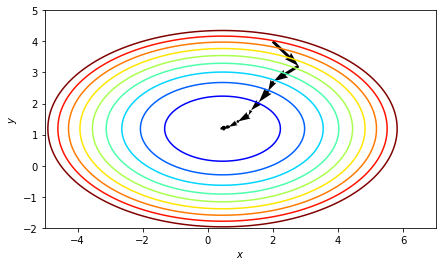

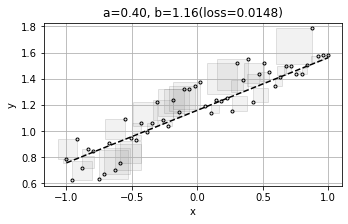

In [ ]:
# RMSProp
batch_size = 5 # batch 크기
MaxEpochs = 2 # epoch 수

epsilon = 0.25
delta = 1E-10
rho = 0.9
r = np.zeros_like(w0)

paths = []
batch_loss = []

w0 = np.array([2.0, 4.0]) # 1) 초깃값
print('Iter\tw_k\t\tgrad\t\tdw\t\tloss')
print('{:01d}-{:02d}\t{}'.format(1,0,np.array2string(w0, formatter={'float_kind':lambda x: "%.2f" % x})))

# 2) 데이터 셔플링 : 선택적(생략)

# 알고리즘
for epoch in range(MaxEpochs): # 5) MaxEpochs번 반복
    k = 0
    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train): # 3) 미니 뱃치 생성
        paths.append(w0)
        batch_loss.append(loss(w0, x_batch, y_batch))
        grad = loss_grad(w0, x_batch, y_batch) # 4)-1 미니 뱃치에서 그래디언트 계산
        search_direction = -grad # 4)-2 탐색 방향 설정
        # 4)-3 학습률 설정
        r = rho * r  + (1. - rho) * grad * grad
        lr = epsilon / np.sqrt(delta + r)
        dw = lr * search_direction # 4)-4 파라미터 업데이트
        w0 = w0 + dw
        print('{:01d}-{:02d}\t{}\t{}\t{}\t{:5.4f}'.format(epoch+1,k +1,
                                                  np.array2string(w0, formatter={'float_kind':lambda x: "%.2f" % x}),
                                                  np.array2string(grad, formatter={'float_kind':lambda x: "%.2f" % x}),
                                                  np.array2string(dw, formatter={'float_kind':lambda x: "%.2f" % x}),
                                                  loss(w0, x_train, y_train)))
        k += 1

contour_with_path(LOSSW, W0, W1, paths, norm=None, level=np.linspace(0, 10, 10))
visualize_l2(w0[0], w0[1], x_train, y_train, loss(w0, x_train, y_train))